# Forecast Gold Prices

# Business Objective:
  Gold prices are difficult to forecast due to externalities, but our aim is to build the model which can help us to understand the pattern and make smart decision for customers and businesses.
  
# EDA
EDA is a crucial but important step in data analysis.

Exploratory data analysis is an approach to analyze the data using visualization and statistical techniques.

# Steps in EDA
Describing the data

Data Cleaning

Data Manupilation

Data Analysis & Visualization

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')

import calplot
import plotly.graph_objects as go
import plotly.express as px
import calendar

import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from datetime import datetime
import subprocess
from math import sqrt
from numpy import log
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
from scipy.stats.mstats import normaltest
from pandas.plotting import lag_plot


In [2]:
# Read the CSV file and display the first few rows
gd = pd.read_csv(r"C:\Users\DELL\Desktop\project\gd.csv")
gd

date    price
0     01-01-2016  2252.60
1     02-01-2016  2454.50
2     03-01-2016  2708.10
3     04-01-2016  2577.80
4     05-01-2016  2597.75
...          ...      ...
2177  17-12-2021  4394.40
2178  18-12-2021  4389.50
2179  19-12-2021  4389.50
2180  20-12-2021  4354.10
2181  21-12-2021  4346.50

[2182 rows x 2 columns]

In [3]:
gd.head(10)

date    price
0  01-01-2016  2252.60
1  02-01-2016  2454.50
2  03-01-2016  2708.10
3  04-01-2016  2577.80
4  05-01-2016  2597.75
5  06-01-2016  2617.70
6  07-01-2016  2903.80
7  08-01-2016  2887.80
8  09-01-2016  2813.80
9  10-01-2016  2786.80

In [4]:
gd.tail(10)

date   price
2172  12-12-2021  4333.5
2173  13-12-2021  4351.4
2174  14-12-2021  4328.2
2175  15-12-2021  4348.7
2176  16-12-2021  4399.8
2177  17-12-2021  4394.4
2178  18-12-2021  4389.5
2179  19-12-2021  4389.5
2180  20-12-2021  4354.1
2181  21-12-2021  4346.5

In [5]:
gd.shape

(2182, 2)

So, we have 2182 records in the dataset and 2 columns.

# Performing EDA In Dataset

In [6]:
gd.describe(include='all')

date        price
count         2182  2182.000000
unique        2182          NaN
top     01-01-2016          NaN
freq             1          NaN
mean           NaN  3284.450046
std            NaN   719.564434
min            NaN  2252.600000
25%            NaN  2697.020000
50%            NaN  2879.800000
75%            NaN  4147.325000
max            NaN  4966.300000

In [7]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [8]:
gd.dtypes

date      object
price    float64
dtype: object

# Checking Missing Values

In [9]:
gd.isnull().sum()

date     0
price    0
dtype: int64

That's great ! we dont have any missing values in our dataset.

# Duplicates

In [10]:
gd[gd.duplicated()].shape

(0, 2)

In [11]:
#Print the duplicated rows
gd[gd.duplicated()]

Empty DataFrame
Columns: [date, price]
Index: []

That's great ! we dont have any Duplicates values in our dataset.

# Rename the columns

In [12]:
gd.rename(columns= {'date':'Date'}, inplace=True)
gd.rename(columns= {'price':'Price'}, inplace=True)

In [13]:
gd

Date    Price
0     01-01-2016  2252.60
1     02-01-2016  2454.50
2     03-01-2016  2708.10
3     04-01-2016  2577.80
4     05-01-2016  2597.75
...          ...      ...
2177  17-12-2021  4394.40
2178  18-12-2021  4389.50
2179  19-12-2021  4389.50
2180  20-12-2021  4354.10
2181  21-12-2021  4346.50

[2182 rows x 2 columns]

In [14]:
gd['Date'] = pd.DatetimeIndex(gd['Date'])

In [15]:
gd= gd.set_index(gd['Date'])

In [16]:
gd

Date    Price
Date                          
2016-01-01 2016-01-01  2252.60
2016-02-01 2016-02-01  2454.50
2016-03-01 2016-03-01  2708.10
2016-04-01 2016-04-01  2577.80
2016-05-01 2016-05-01  2597.75
...               ...      ...
2021-12-17 2021-12-17  4394.40
2021-12-18 2021-12-18  4389.50
2021-12-19 2021-12-19  4389.50
2021-12-20 2021-12-20  4354.10
2021-12-21 2021-12-21  4346.50

[2182 rows x 2 columns]

In [17]:
gd.drop('Date',axis = 1)

Price
Date               
2016-01-01  2252.60
2016-02-01  2454.50
2016-03-01  2708.10
2016-04-01  2577.80
2016-05-01  2597.75
...             ...
2021-12-17  4394.40
2021-12-18  4389.50
2021-12-19  4389.50
2021-12-20  4354.10
2021-12-21  4346.50

[2182 rows x 1 columns]

In [18]:
gd.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [19]:
mean=gd['Price'].mean()
# computing standard deviation of Gold stock
std=gd['Price'].std()
skew=gd['Price'].skew()
kur=gd['Price'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print ('skewness=',skew)
print ('kurtosis=',kur)

Mean= 3284.4500458295142
Standard Deviation= 719.564434341322
skewness= 0.6373117447692479
kurtosis= -1.2431585470189335


# Visualization

# A quick box plot

<Axes: >

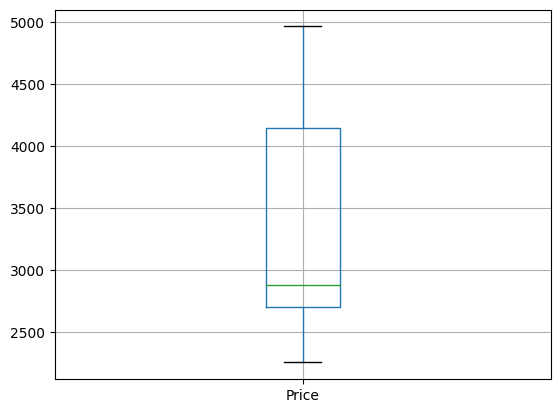

In [20]:
gd.boxplot(column=["Price"])

We dont have any outliers in our dataset.

# Check Trend Data

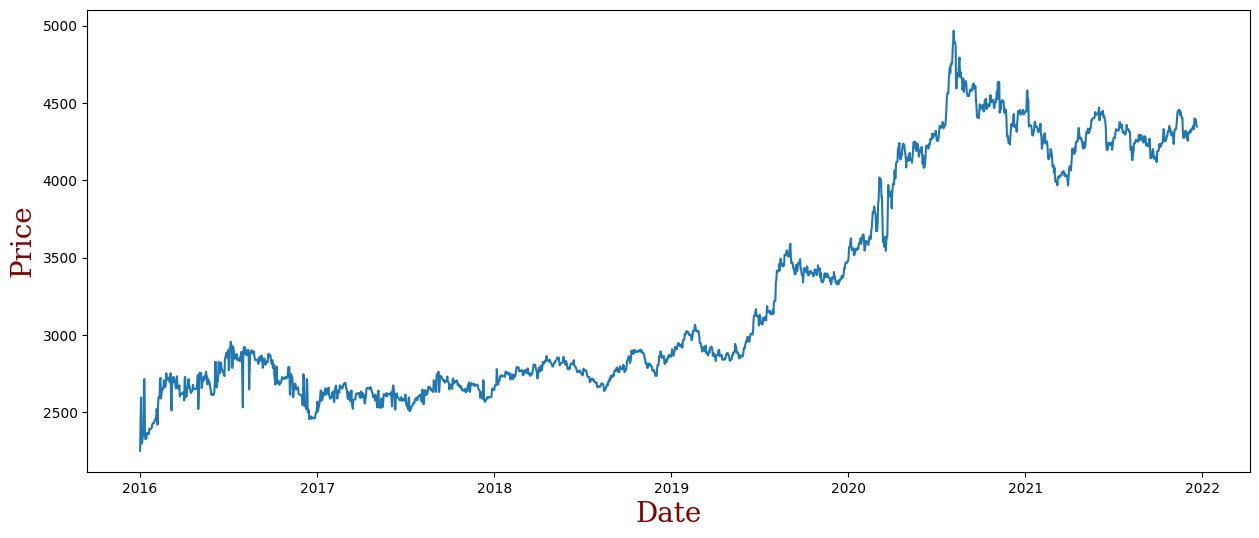

In [21]:
plt.figure(figsize=(15,6))
font1 = {'family':'serif','color':'darkmagenta','size':22}
font2 = {'family':'serif','color':'maroon','size':20}   
sns.lineplot(x='Date',y='Price',data=gd)
plt.ylabel('Price',fontdict =font2)
plt.xlabel('Date', fontdict = font2)
plt.show()

we can see that the trend in gold price over time.

# Check Normality in data

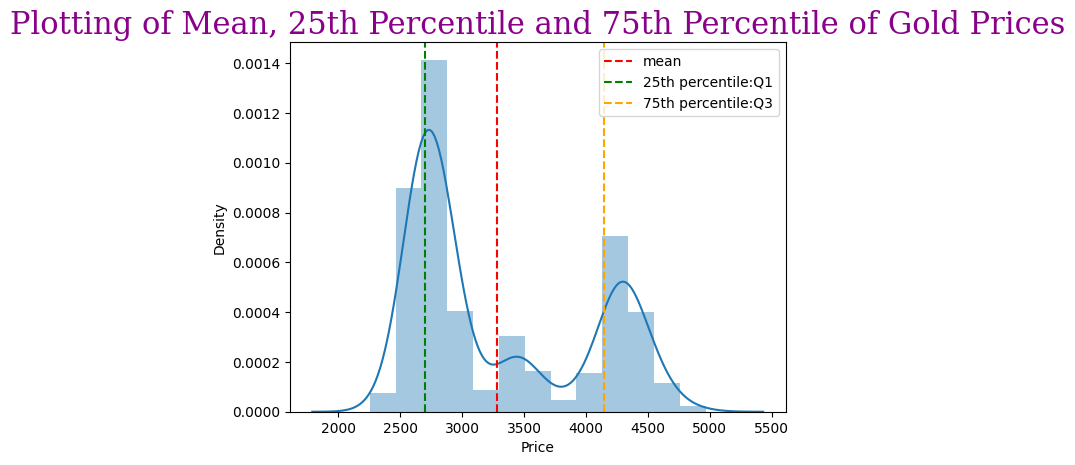

In [22]:
sns.distplot(gd['Price'])
plt.axvline(x=np.mean(gd['Price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(gd['Price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(gd['Price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.title("Plotting of Mean, 25th Percentile and 75th Percentile of Gold Prices", fontdict=font1 )
plt.legend()

                   25th percentile= 2697.020000

                   Mean= 3284.450045829511

                   75th percentile = 4147.325000

# Check Trend Using Plotly

In [23]:
fig = go.Figure(data=go.Scatter(x=gd['Date'],y=gd['Price'], mode='markers'))
fig.show()

From above visualization we can see that there is variation in the gold price. 
we will get price details.

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x1020 with 7 Axes>,
 array([<Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


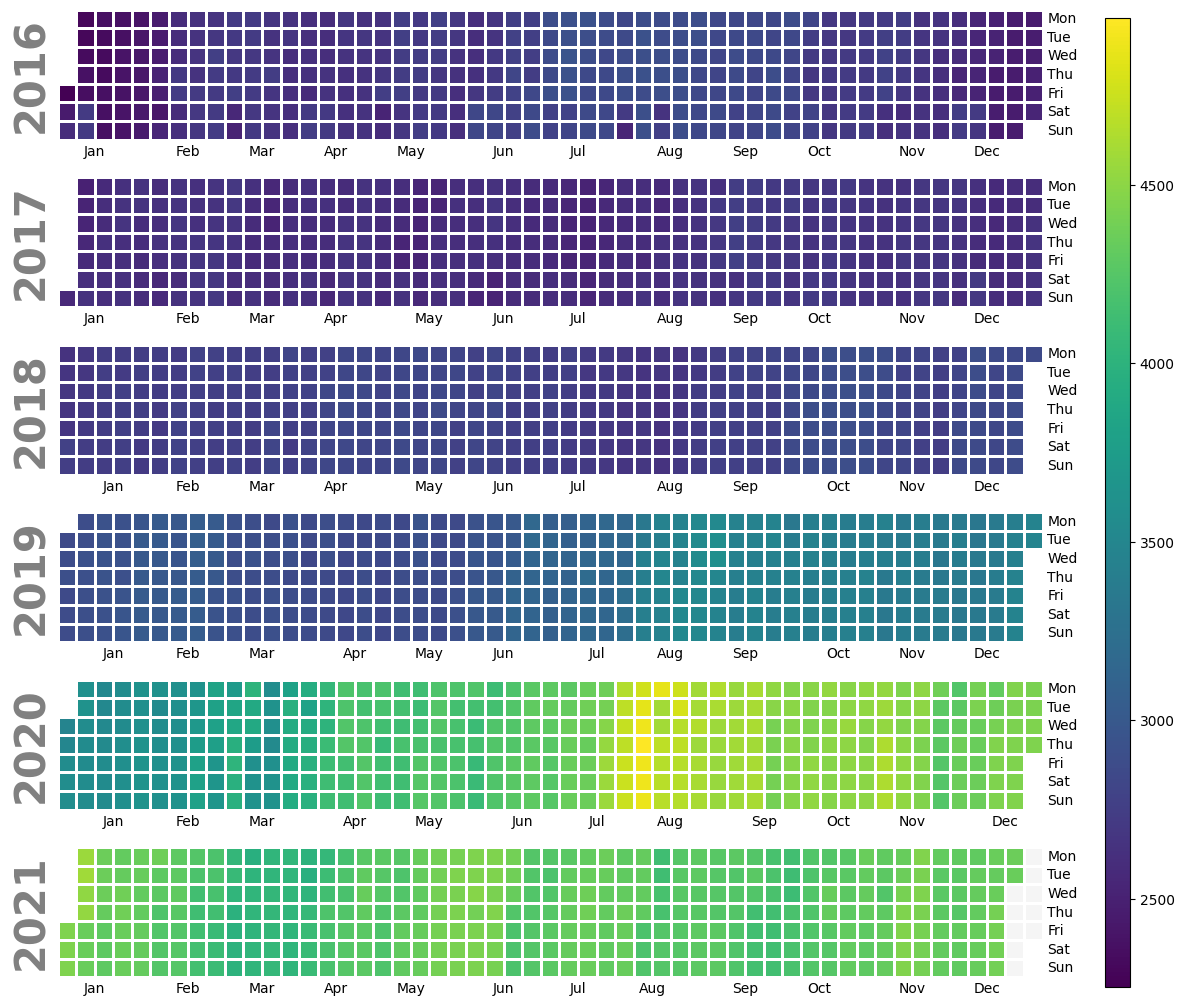

In [24]:
calplot.calplot(gd['Price'],edgecolor=None)

From above visualization we can see that the trend in gold price overtime in calender format

# Trend & Seasonality using Seaborn lib

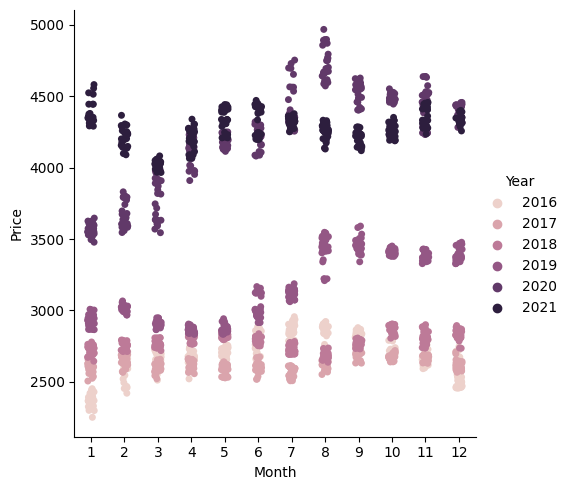

In [25]:
gd['Year'] = gd['Date'].dt.year
gd['Month'] =gd['Date'].dt.month
sns.catplot(data = gd, x ="Month", y = "Price", hue = "Year")

From above visualization we can see that Avg.Monthly gold price for each year in data set

In [26]:
df=gd
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)
df_year = gd[['Price','Year']].groupby(by='Year').sum().reset_index()

df_year

Year         Price
0  2016  9.847648e+05
1  2017  9.587369e+05
2  2018  1.015407e+06
3  2019  1.149827e+06
4  2020  1.543195e+06
5  2021  1.514739e+06

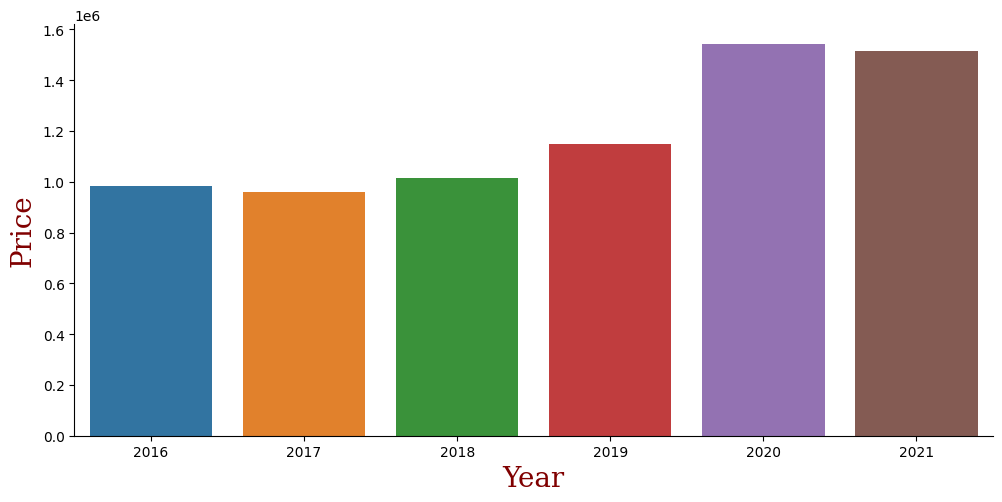

In [27]:
sns.catplot(x='Year',y='Price',data=df_year,kind='bar',aspect=2)
plt.ylabel('Price',fontdict =font2)
plt.xlabel('Year', fontdict = font2)
plt.show()

 This plot shows total gold prices for each year in df_year.

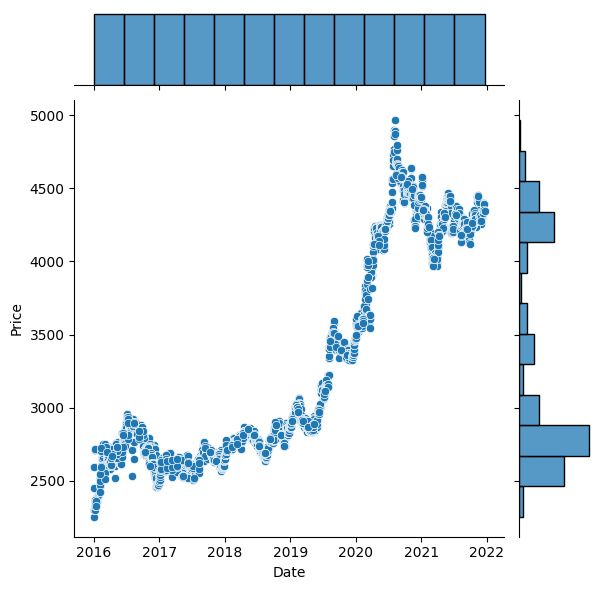

In [28]:
sns.jointplot(x='Date',y='Price',data=gd);

# Monthly & Yeary Gold Price
# (TREND & SEASONALITY)

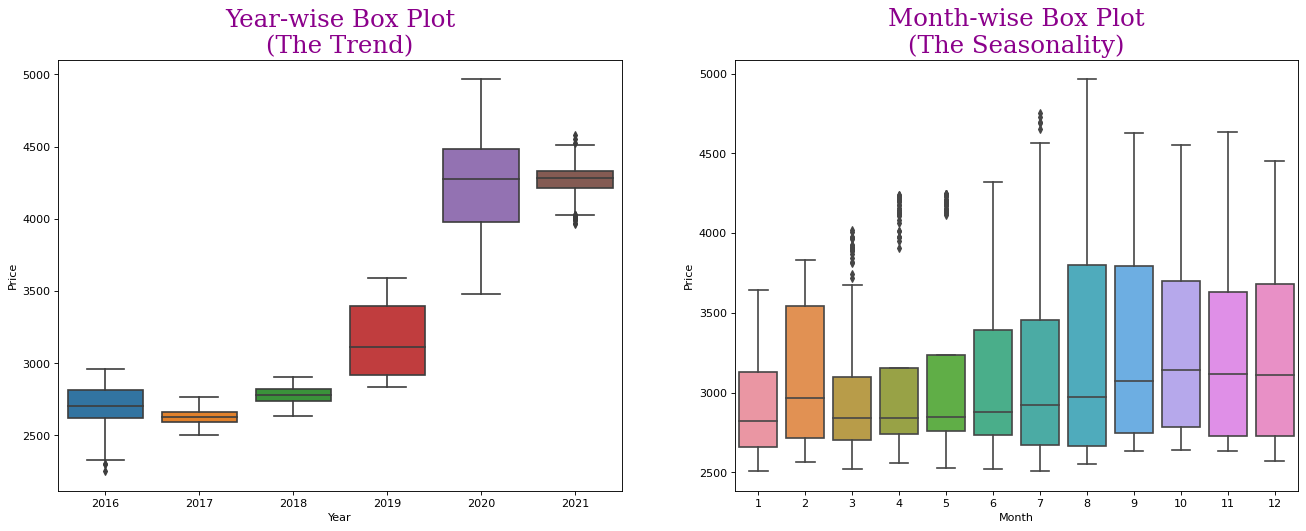

In [29]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Price', data=gd, ax=axes[0])
sns.boxplot(x='Month', y='Price', data=gd.loc[~gd.Year.isin([2016, 2021]), :])

axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontdict =font1);  
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontdict =font1)
plt.show()

Inference:- From the price of gold month vs. year plot, we can infer an increasing trend over the years.
The Price of gold has increased from approximately 28000 in 2016 to slightly over 48000 in 2020. 
A clear trend is captured by the lineplot above
     

# Weekly Gold Price

[Text(0.5, 1.0, 'Weekly Gold Price')]

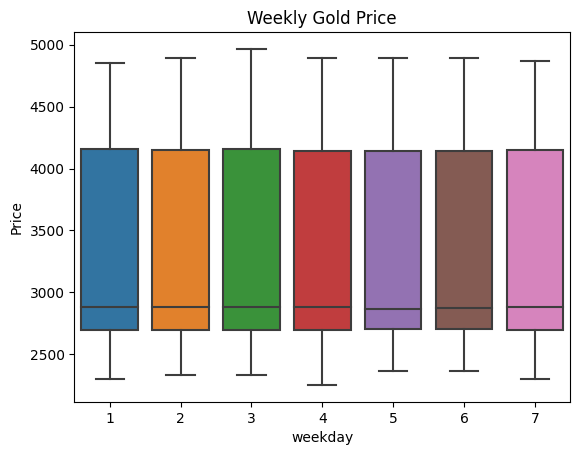

In [30]:
plot = sns.boxplot(x='weekday', y='Price', data=gd)
plot.set(title='Weekly Gold Price')

Text(158.22222222222223, 0.5, 'Months')

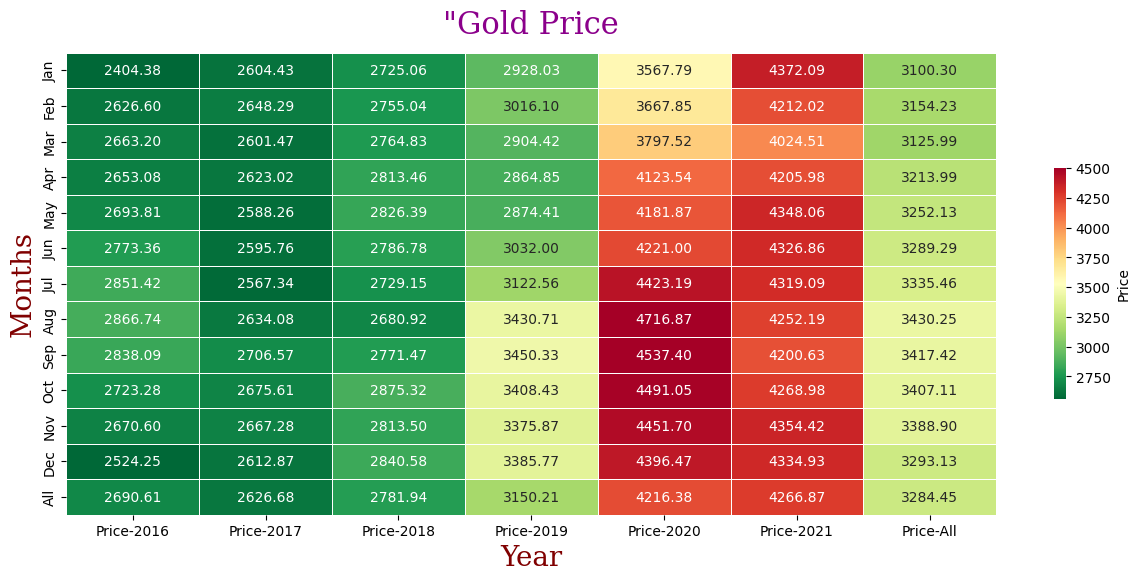

In [31]:
plt.figure(figsize=(15,6))
table_df = pd.pivot_table(gd, values=["Price"],
                                   index=["Month"],
                                   columns=["Year"],
                                   margins=True)
 
# Naming the index, can be generated
# using calendar.month_abbr[i]
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
             'May', 'Jun', 'Jul', 'Aug',
             'Sep','Oct', 'Nov', 'Dec', 'All']]
 
# Indexing using Month Names
table_df = table_df.set_index(mon_name)
 
# Creating a heatmap using sns with Red,
# Yellow & Green Colormap.
ax = sns.heatmap(table_df, cmap='RdYlGn_r',
                 robust=True, fmt='.2f',
                 annot=True, linewidths=.6,
                 annot_kws={'size':10},
                 cbar_kws={'shrink':.5,
                           'label':'Price'})                      
 
# Setting the Tick Labels, Title and x & Y labels
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels())
plt.title('"Gold Price', pad=14,fontdict= font1)
plt.xlabel('Year', fontdict= font2)
plt.ylabel('Months',fontdict= font2)

# Correlation

Finally, to find the correlation among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

In [32]:
gd.corr()

Price      Year     Month      year     month       day   weekday
Price    1.000000  0.880318  0.131526  0.880318  0.131526  0.001223 -0.000689
Year     0.880318  1.000000 -0.010417  1.000000 -0.010417 -0.008684 -0.000735
Month    0.131526 -0.010417  1.000000 -0.010417  1.000000  0.001173  0.002167
year     0.880318  1.000000 -0.010417  1.000000 -0.010417 -0.008684 -0.000735
month    0.131526 -0.010417  1.000000 -0.010417  1.000000  0.001173  0.002167
day      0.001223 -0.008684  0.001173 -0.008684  0.001173  1.000000 -0.002243
weekday -0.000689 -0.000735  0.002167 -0.000735  0.002167 -0.002243  1.000000

Finally, to find the correlation among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

<Axes: >

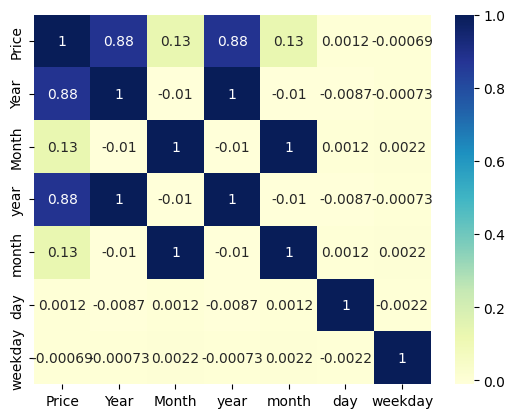

In [33]:
sns.heatmap(gd.corr(),annot=True,cmap='YlGnBu')

Here the two columns Price and Year are strongly correlated with each other as compared to others.

In [34]:
gd['Daily Return'] = gd['Price'].pct_change()
fig = px.histogram(gd, x="Date", y="Daily Return", histfunc="avg", title="Daily Return")
fig.show()

In [35]:
fig = px.scatter(gd, x="Date", y="Daily Return", title="Daily Return")
fig.show()

In [36]:
gd1=gd.copy()
gd1

Date    Price  Year  Month  year  month  day  weekday  \
Date                                                                     
2016-01-01 2016-01-01  2252.60  2016      1  2016      1    1        4   
2016-02-01 2016-02-01  2454.50  2016      2  2016      2    1        7   
2016-03-01 2016-03-01  2708.10  2016      3  2016      3    1        1   
2016-04-01 2016-04-01  2577.80  2016      4  2016      4    1        4   
2016-05-01 2016-05-01  2597.75  2016      5  2016      5    1        6   
...               ...      ...   ...    ...   ...    ...  ...      ...   
2021-12-17 2021-12-17  4394.40  2021     12  2021     12   17        4   
2021-12-18 2021-12-18  4389.50  2021     12  2021     12   18        5   
2021-12-19 2021-12-19  4389.50  2021     12  2021     12   19        6   
2021-12-20 2021-12-20  4354.10  2021     12  2021     12   20        7   
2021-12-21 2021-12-21  4346.50  2021     12  2021     12   21        1   

            Daily Return  
Date                      
2016-01-01           NaN  
2016-02-01      0.089630  
2016-03-01      0.103320  
2016-04-01     -0.048115  
2016-05-01      0.007739  
...                  ...  
2021-12-17     -0.001227  
2021-12-18     -0.001115  
2021-12-19      0.000000  
2021-12-20     -0.008065  
2021-12-21     -0.001745  

[2182 rows x 9 columns]

In [37]:
gd1['year']=gd1['Date'].dt.year
yearly_data = gd1.groupby('year')

In [38]:
# outliers

In [39]:
def cap_outliers(x):
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1
    upper_cap = Q3 + 1.5 * IQR 
    lower_cap = Q1 - 1.5 * IQR
    capped_values = np.clip(x, lower_cap, upper_cap)
    return capped_values

In [40]:
#capping Method to replace outliers
capped_data = yearly_data.apply(lambda x: cap_outliers(x['Price']))

In [41]:
gd1['new_price'] = capped_data.reset_index(level=0, drop=True)

In [42]:
gd1.to_csv('cleaned_data.csv', index=False)

In [43]:
gd1['new_price'] = capped_data.reset_index(level=0, drop=True)

In [44]:
gd1.head(10)

Date    Price  Year  Month  year  month  day  weekday  \
Date                                                                     
2016-01-01 2016-01-01  2252.60  2016      1  2016      1    1        4   
2016-02-01 2016-02-01  2454.50  2016      2  2016      2    1        7   
2016-03-01 2016-03-01  2708.10  2016      3  2016      3    1        1   
2016-04-01 2016-04-01  2577.80  2016      4  2016      4    1        4   
2016-05-01 2016-05-01  2597.75  2016      5  2016      5    1        6   
2016-06-01 2016-06-01  2617.70  2016      6  2016      6    1        2   
2016-07-01 2016-07-01  2903.80  2016      7  2016      7    1        4   
2016-08-01 2016-08-01  2887.80  2016      8  2016      8    1        7   
2016-09-01 2016-09-01  2813.80  2016      9  2016      9    1        3   
2016-10-01 2016-10-01  2786.80  2016     10  2016     10    1        5   

            Daily Return  new_price  
Date                                 
2016-01-01           NaN    2325.70  
2016-02-01      0.089630    2454.50  
2016-03-01      0.103320    2708.10  
2016-04-01     -0.048115    2577.80  
2016-05-01      0.007739    2597.75  
2016-06-01      0.007680    2617.70  
2016-07-01      0.109294    2903.80  
2016-08-01     -0.005510    2887.80  
2016-09-01     -0.025625    2813.80  
2016-10-01     -0.009596    2786.80

In [45]:
gd2 = gd1.drop(columns=['year','month'],axis=1)
gd2

Date    Price  Year  Month  day  weekday  Daily Return  \
Date                                                                      
2016-01-01 2016-01-01  2252.60  2016      1    1        4           NaN   
2016-02-01 2016-02-01  2454.50  2016      2    1        7      0.089630   
2016-03-01 2016-03-01  2708.10  2016      3    1        1      0.103320   
2016-04-01 2016-04-01  2577.80  2016      4    1        4     -0.048115   
2016-05-01 2016-05-01  2597.75  2016      5    1        6      0.007739   
...               ...      ...   ...    ...  ...      ...           ...   
2021-12-17 2021-12-17  4394.40  2021     12   17        4     -0.001227   
2021-12-18 2021-12-18  4389.50  2021     12   18        5     -0.001115   
2021-12-19 2021-12-19  4389.50  2021     12   19        6      0.000000   
2021-12-20 2021-12-20  4354.10  2021     12   20        7     -0.008065   
2021-12-21 2021-12-21  4346.50  2021     12   21        1     -0.001745   

            new_price  
Date                   
2016-01-01    2325.70  
2016-02-01    2454.50  
2016-03-01    2708.10  
2016-04-01    2577.80  
2016-05-01    2597.75  
...               ...  
2021-12-17    4394.40  
2021-12-18    4389.50  
2021-12-19    4389.50  
2021-12-20    4354.10  
2021-12-21    4346.50  

[2182 rows x 8 columns]

Text(0.5, 1.0, 'Gold Price Trend')

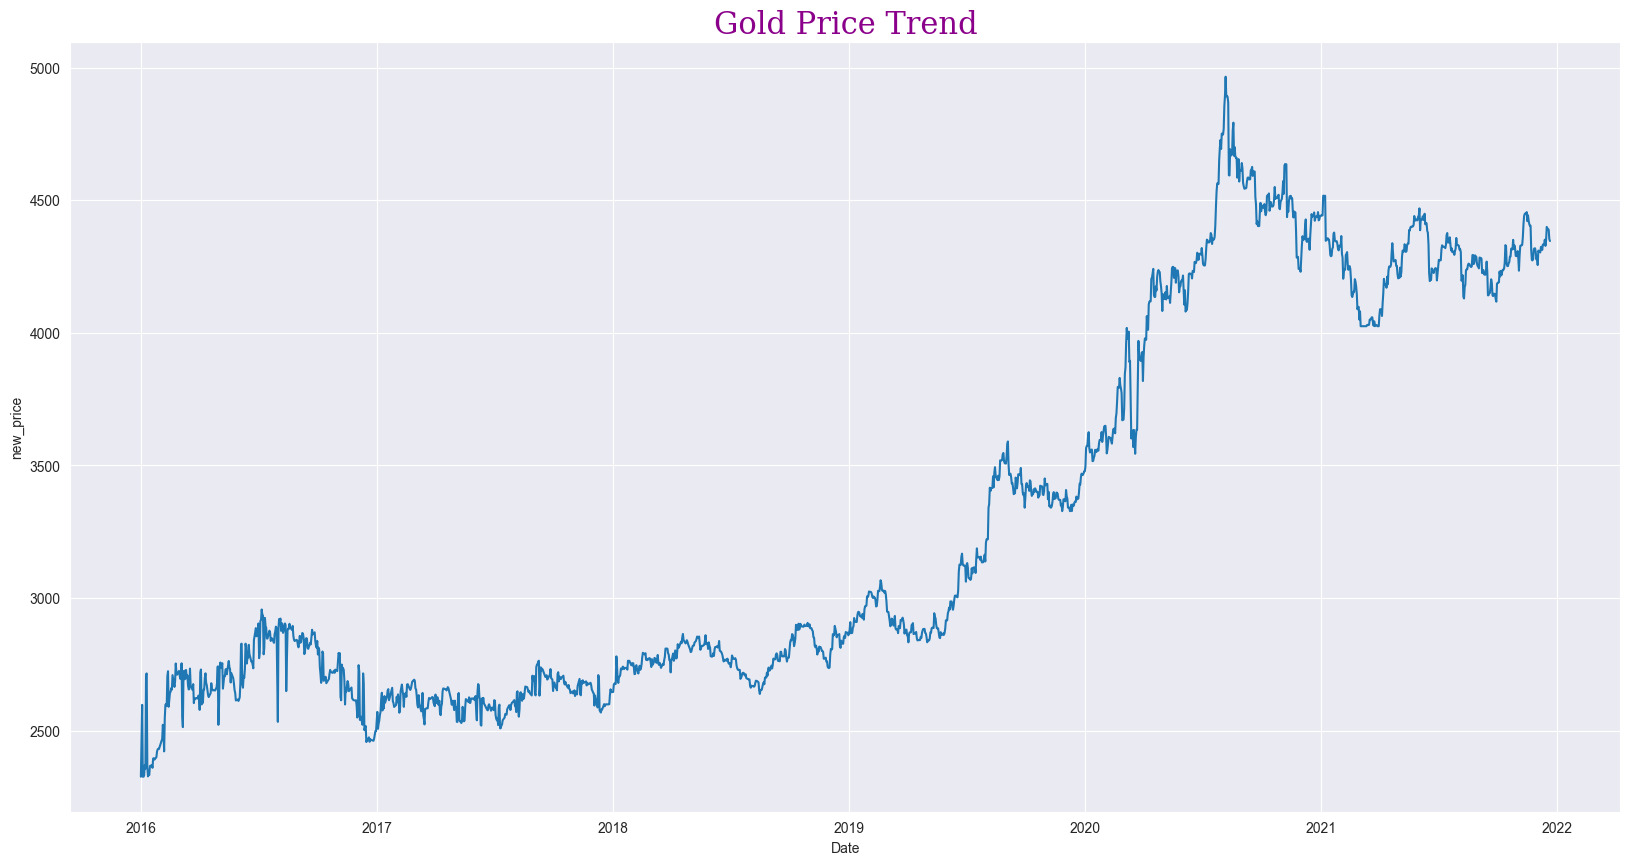

In [46]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(x='Date',y='new_price',data=gd2)
plt.title('Gold Price Trend',fontdict=font1)

# Model Building

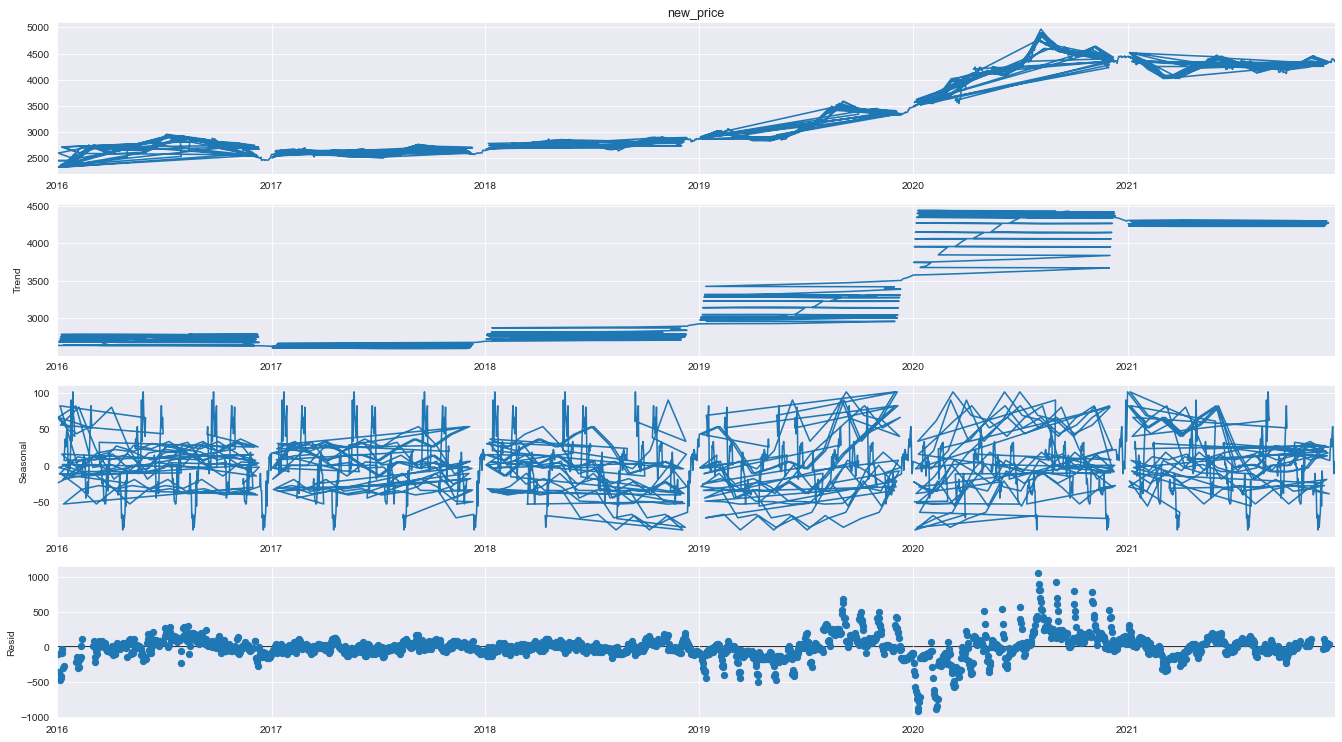

In [47]:
plt.rcParams.update({'figure.figsize':(18,10), 'figure.dpi':75})
decomposition = sm.tsa.seasonal_decompose(gd2['new_price'], period=120)
decomposition.plot()
plt.show()

Trend - Slow moving changes in a time series, Responisble for making series gradually increase or decrease over time.

Seasonality - Seasonal Paterns in the series. The cycles occur repeatedly over a fixed period of time.

Residuals - The behaviour of the time series that cannot be explained by the trend and seasonality components. Also called random errors/white noise.

# Split The Data

In [48]:
split=round(len(gd2)/2)
df_1=gd2[0:split]
df_2=gd2[split:]

In [49]:
df_1.mean()

Price           2698.965628
Year            2016.994500
Month              6.496792
day               15.671861
weekday            4.000917
Daily Return       0.000523
new_price       2699.078735
dtype: float64

In [50]:
df_2.mean()

Price           3869.934464
Year            2019.981668
Month              6.496792
day               15.694775
weekday            4.001833
Daily Return       0.001087
new_price       3870.123258
dtype: float64

In [51]:
df_1.var()

Price           13222.816357
Year                0.666025
Month              11.822696
day                77.070207
weekday             4.006421
Daily Return        0.000618
new_price       13132.223977
dtype: float64

In [52]:
df_2.var()

Price           336585.171545
Year                 0.678563
Month               11.822696
day                 77.566386
weekday              4.003666
Daily Return         0.001354
new_price       336532.851849
dtype: float64

In [53]:
X_train=gd2[:1827]
X_test=gd2[1827:]


print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)

X_train Shape (1827, 8)
X_test Shape (355, 8)


# FORECASTING NINE MONTHS AHEAD

In [54]:
X_train = X_train[['Date','new_price']]
X_test = X_test[['Date','new_price']]

X_train.set_index('Date', inplace=True)
X_test.set_index('Date', inplace=True)

In [55]:
index_12_months = pd.date_range(X_test.index[-1], freq='MS', periods=24)
index_12_months

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', freq='MS')

# USING ADF TEST

In [56]:
def define_d(data):
    X_train = adfuller(data, autolag='AIC')
    adf = X_train[0]
    pvalue = X_train[1]
    critical_value = X_train[4]['5%']
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations', 'Critical Value']
    for value,label in zip(X_train,labels):
        print(label+' : '+str(value) )

    if (pvalue < 0.05):
        print("** Data Is Stationary **")
    else:
        print("** Indicating It Is Non-Stationary **")

define_d(X_train)

ADF Test Statistic : 0.4052781447615695
p-value : 0.9816912554934292
#Lags Used : 25
Number of Observations : 1801
Critical Value : {'1%': -3.4339861159726306, '5%': -2.863146142843122, '10%': -2.5676250581282964}
** Indicating It Is Non-Stationary **


From above ADF test we came to know that the data is non stationary

# Converting non- stationary data into stationary data

In [57]:
data_diff = X_train.diff()
data_diff.dropna(inplace=True)
define_d(data_diff)

ADF Test Statistic : -19.518958843916394
p-value : 0.0
#Lags Used : 25
Number of Observations : 1800
Critical Value : {'1%': -3.4339881389288407, '5%': -2.863147035877915, '10%': -2.567625533641975}
** Data Is Stationary **


# DEFINE p AND q USING PACF AND ACF PLOT

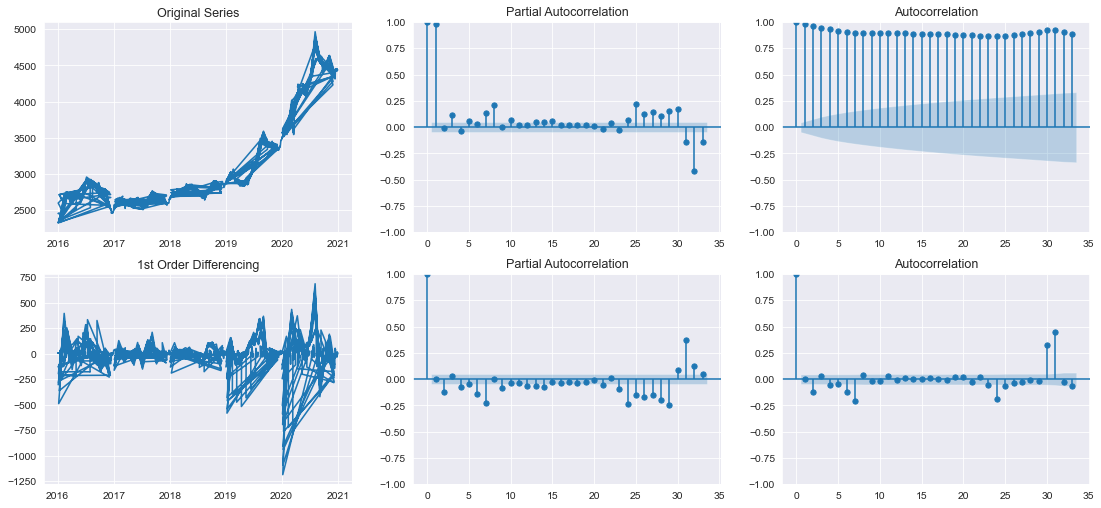

In [58]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})

# Original Series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(X_train); axes[0, 0].set_title('Original Series')
plot_pacf(X_train, ax=axes[0, 1])
plot_acf(X_train, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(X_train.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(X_train.diff().dropna(), ax=axes[1, 1])
plot_acf(X_train.diff().dropna(), ax=axes[1, 2])

plt.show()

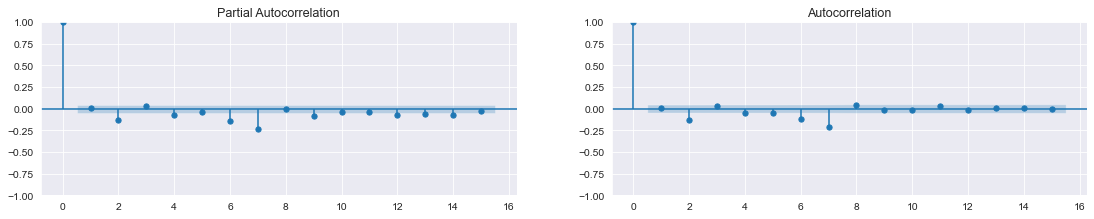

In [59]:
plt.rcParams.update({'figure.figsize':(18,3), 'figure.dpi':75})
fig, ax = plt.subplots(1, 2)
plot_pacf(X_train.diff().dropna(), lags = 15, ax=ax[0])
plot_acf(X_train.diff().dropna(), lags = 15, ax=ax[1])
plt.show()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=4.

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=4.

# Model 1. Prophet

In [60]:
from prophet import Prophet

In [61]:
gd3=gd2.copy()

In [62]:
gd3 = gd2.drop(columns=['Year','Price','Month','day','weekday','Daily Return'],axis=1)
gd3

Date  new_price
Date                            
2016-01-01 2016-01-01    2325.70
2016-02-01 2016-02-01    2454.50
2016-03-01 2016-03-01    2708.10
2016-04-01 2016-04-01    2577.80
2016-05-01 2016-05-01    2597.75
...               ...        ...
2021-12-17 2021-12-17    4394.40
2021-12-18 2021-12-18    4389.50
2021-12-19 2021-12-19    4389.50
2021-12-20 2021-12-20    4354.10
2021-12-21 2021-12-21    4346.50

[2182 rows x 2 columns]

In [63]:
gd3.columns = ["ds","y"]

model = Prophet()
model.fit(gd3)

14:33:06 - cmdstanpy - INFO - Chain [1] start processing
14:33:07 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
future_model = model.make_future_dataframe(periods= 30, freq='d')

In [65]:
forecast1 = model.predict(future_model)
forecast1.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
2207 2022-01-16  4187.828724  4061.496920  4280.030212  4185.428105   
2208 2022-01-17  4187.359970  4059.395152  4268.320258  4184.284507   
2209 2022-01-18  4186.891216  4060.384359  4278.316478  4183.431571   
2210 2022-01-19  4186.422463  4058.927706  4267.282477  4181.245185   
2211 2022-01-20  4185.953709  4055.702107  4264.114605  4180.062717   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
2207  4191.453757      -21.675295            -21.675295            -21.675295   
2208  4192.357312      -21.252336            -21.252336            -21.252336   
2209  4193.436735      -22.068000            -22.068000            -22.068000   
2210  4193.922863      -23.889514            -23.889514            -23.889514   
2211  4194.091561      -23.835463            -23.835463            -23.835463   

        weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
2207 -0.585645     -0.585645     -0.585645 -21.089650    -21.089650   
2208  0.676631      0.676631      0.676631 -21.928967    -21.928967   
2209  0.764222      0.764222      0.764222 -22.832222    -22.832222   
2210 -0.102624     -0.102624     -0.102624 -23.786890    -23.786890   
2211  0.943405      0.943405      0.943405 -24.778868    -24.778868   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
2207    -21.089650                   0.0                         0.0   
2208    -21.928967                   0.0                         0.0   
2209    -22.832222                   0.0                         0.0   
2210    -23.786890                   0.0                         0.0   
2211    -24.778868                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
2207                         0.0  4166.153429  
2208                         0.0  4166.107634  
2209                         0.0  4164.823216  
2210                         0.0  4162.532948  
2211                         0.0  4162.118245

In [66]:
forecast1[["ds","yhat","yhat_lower","yhat_upper"]].head()

ds         yhat   yhat_lower   yhat_upper
0 2016-01-01  2419.958890  2316.765804  2521.664536
1 2016-01-02  2423.064432  2314.934772  2526.637426
2 2016-01-03  2428.427650  2329.428877  2528.620046
3 2016-01-04  2433.994224  2324.593338  2543.882975
4 2016-01-05  2438.282239  2338.111737  2546.415651

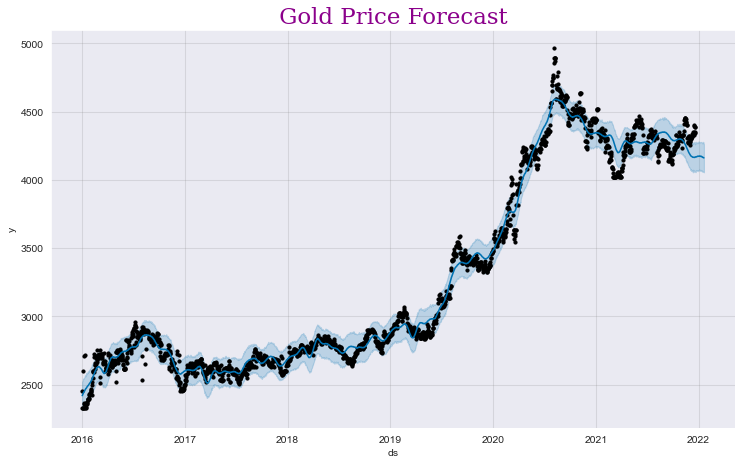

In [67]:
model.plot(forecast1);
plt.title(" Gold Price Forecast ", fontdict=font1)
plt.show()

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# calculate MAE between expected and predicted values for next 60 mont
y_true = gd3['y'].values
y_pred = forecast1['yhat'][:-30].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.2f' % mae)
r = r2_score(y_true, y_pred)
print('R-squared Score: %.2f' % r)
rmse = mean_squared_error(y_true, y_pred)
print('RMSE: %.2f' % rmse)

MAE: 102.66
R-squared Score: 0.94
RMSE: 31031.28


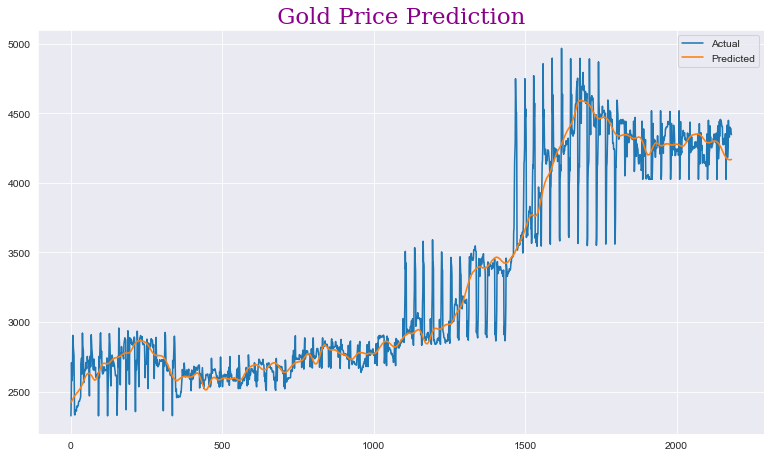

In [69]:
plt.figure(figsize=(12.5,7))
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(" Gold Price Prediction ",fontdict=font1)
plt.grid(True)
plt.legend()
plt.show()

# Model 2.LSTM

In [70]:
gd4 = gd2.copy()
gd4 = gd2.drop(columns=['Year','Price','Month','day','weekday','Daily Return'],axis=1)
gd4

Date  new_price
Date                            
2016-01-01 2016-01-01    2325.70
2016-02-01 2016-02-01    2454.50
2016-03-01 2016-03-01    2708.10
2016-04-01 2016-04-01    2577.80
2016-05-01 2016-05-01    2597.75
...               ...        ...
2021-12-17 2021-12-17    4394.40
2021-12-18 2021-12-18    4389.50
2021-12-19 2021-12-19    4389.50
2021-12-20 2021-12-20    4354.10
2021-12-21 2021-12-21    4346.50

[2182 rows x 2 columns]

In [71]:
scaler = MinMaxScaler()
# fit the format of the scaler -> convert shape from (1000, ) -> (1000, 1)
price = gd4.new_price.values.reshape(-1, 1)
scaled = scaler.fit_transform(price)

seq_len = 60

def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    x_train = sequences[:n_train, :-1, :]
    y_train = sequences[:n_train, -1, :]
    x_test = sequences[n_train:, :-1, :]
    y_test = sequences[n_train:, -1, :]
    return x_train, y_train, y_test, y_test

x_train, y_train, x_test, y_test = get_train_test_sets(scaled, seq_len, train_frac=0.8)

In [72]:
# fraction of the input to drop; helps prevent overfitting
dropout = 0.2
window_size = seq_len - 1

# build a 3-layer LSTM RNN
model = keras.Sequential()

model.add(LSTM(window_size, return_sequences=True, input_shape=(window_size, x_train.shape[-1])))
model.add(Dropout(rate=dropout))
# Bidirectional allows for training of sequence data forwards and backwards
model.add(Bidirectional(LSTM((window_size * 2), return_sequences=True))) 
model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size, return_sequences=False))) 
model.add(Dense(units=1))
# linear activation function: activation is proportional to the input
model.add(Activation('linear'))

model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(x_train,y_train,epochs=10,batch_size=32,shuffle=False,validation_split=0.2)

Epoch 1/10
43/43 [==============================] - 12s 120ms/step - loss: 0.0032 - val_loss: 0.0481
Epoch 2/10
43/43 [==============================] - 4s 86ms/step - loss: 0.0036 - val_loss: 0.0615
Epoch 3/10
43/43 [==============================] - 4s 93ms/step - loss: 0.0035 - val_loss: 0.0812
Epoch 4/10
43/43 [==============================] - 4s 95ms/step - loss: 0.0035 - val_loss: 0.0958
Epoch 5/10
43/43 [==============================] - 4s 94ms/step - loss: 0.0036 - val_loss: 0.0785
Epoch 6/10
43/43 [==============================] - 4s 86ms/step - loss: 0.0042 - val_loss: 0.0777
Epoch 7/10
43/43 [==============================] - 4s 89ms/step - loss: 0.0046 - val_loss: 0.0760
Epoch 8/10
43/43 [==============================] - 4s 87ms/step - loss: 0.0048 - val_loss: 0.1030
Epoch 9/10
43/43 [==============================] - 4s 87ms/step - loss: 0.0057 - val_loss: 0.0556
Epoch 10/10
43/43 [==============================] - 4s 86ms/step - loss: 0.0079 - val_loss: 0.0848


14/14 [==============================] - 1s 2ms/step


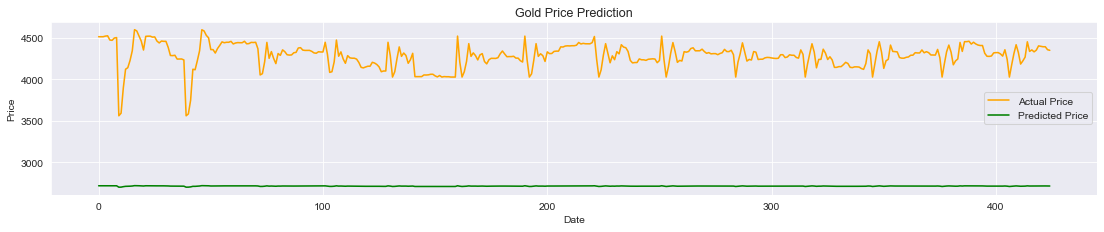

In [73]:
y_pred = model.predict(x_test)

# invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

# plots of prediction against actual data
plt.plot(y_test_orig, label='Actual Price', color='orange')
plt.plot(y_pred_orig, label='Predicted Price', color='green')
 
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show();

In [74]:
mae = mean_absolute_error(y_test_orig, y_pred_orig)
print('MAE: %.2f' % mae)
r = r2_score(y_test_orig, y_pred_orig)
print('R-squared Score: %.2f' % r)
rmse = mean_squared_error(y_test_orig, y_pred_orig)
print('RMSE: %.2f' % rmse)

MAE: 1566.22
R-squared Score: -117.83
RMSE: 2473121.56


# Model 3 ARIMA 

In [75]:
gd5 = gd2.copy()
gd5 = gd2.drop(columns=['Year','Price','Month'],axis=1)
gd5

Date  day  weekday  Daily Return  new_price
Date                                                        
2016-01-01 2016-01-01    1        4           NaN    2325.70
2016-02-01 2016-02-01    1        7      0.089630    2454.50
2016-03-01 2016-03-01    1        1      0.103320    2708.10
2016-04-01 2016-04-01    1        4     -0.048115    2577.80
2016-05-01 2016-05-01    1        6      0.007739    2597.75
...               ...  ...      ...           ...        ...
2021-12-17 2021-12-17   17        4     -0.001227    4394.40
2021-12-18 2021-12-18   18        5     -0.001115    4389.50
2021-12-19 2021-12-19   19        6      0.000000    4389.50
2021-12-20 2021-12-20   20        7     -0.008065    4354.10
2021-12-21 2021-12-21   21        1     -0.001745    4346.50

[2182 rows x 5 columns]

In [76]:
from statsmodels.tsa.arima.model import ARIMA

In [77]:
arima = ARIMA(gd5['new_price'], order=(3,1,2)).fit()
predictions = arima.predict()

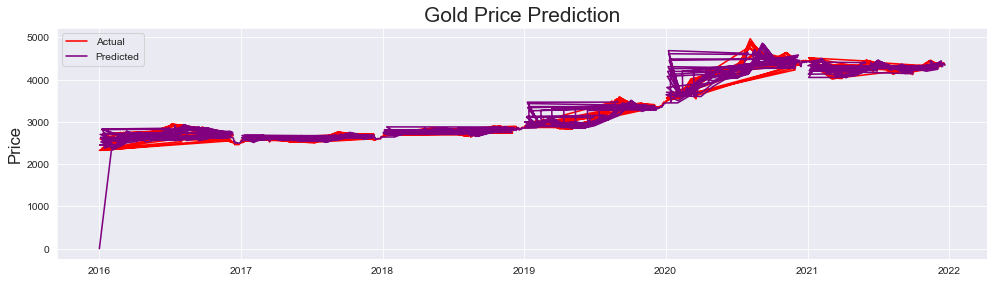

In [78]:
plt.figure(figsize=(16,4))
plt.plot(gd5.new_price, label="Actual",  color='red')
plt.plot(predictions, label="Predicted",  color='purple')
plt.title('Gold Price Prediction', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.legend()

In [79]:
mae = mean_absolute_error(gd5.new_price, predictions)
print('MAE: %.2f' % mae)
r = r2_score(gd5.new_price, predictions)
print('R-squared Score: %.2f' % r)
rmse = mean_squared_error(gd5.new_price, predictions)
print('RMSE: %.2f' % rmse)

MAE: 57.22
R-squared Score: 0.97
RMSE: 14022.37


MODEL AUTOARIMA

In [80]:
df = pd.date_range(start='1/1/2016', end='21/12/2021', freq='M')
df

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
      

In [81]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\project\gd.csv")

In [82]:
df['date'] = pd.to_datetime(df['date'])
df

date    price
0    2016-01-01  2252.60
1    2016-02-01  2454.50
2    2016-03-01  2708.10
3    2016-04-01  2577.80
4    2016-05-01  2597.75
...         ...      ...
2177 2021-12-17  4394.40
2178 2021-12-18  4389.50
2179 2021-12-19  4389.50
2180 2021-12-20  4354.10
2181 2021-12-21  4346.50

[2182 rows x 2 columns]

In [83]:
df = df.set_index('date')

In [84]:
train    =   df[df.index.year <= 2020]
test     =   df[df.index.year > 2020]

In [85]:
print(train.shape)
print(test.shape)

(1827, 1)
(355, 1)


In [86]:
print(train.shape)
print(test.shape)

(1827, 1)
(355, 1)


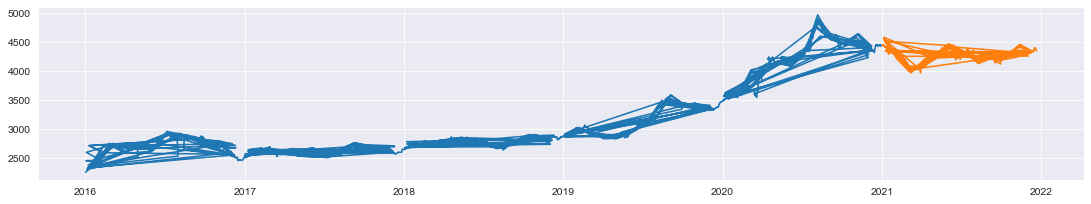

In [87]:
plt.plot(train)
plt.plot(test)
plt.show()

In [88]:
# Figure out order for ARIMA Model
from pmdarima import auto_arima

In [89]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22374.613, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22546.376, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22548.368, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22548.362, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22544.571, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22516.950, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22518.306, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22383.062, Time=1.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22381.946, Time=1.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22538.332, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22380.067, Time=1.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22520.203, Time=0.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22353.708, Time=2.07 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=22336.771, Time=2.29 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1827
Model:               SARIMAX(5, 1, 4)   Log Likelihood              -11142.452
Date:                Fri, 28 Jul 2023   AIC                          22306.903
Time:                        14:34:32   BIC                          22367.512
Sample:                             0   HQIC                         22329.260
                               - 1827                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1454      0.099      1.465      0.143      -0.049       0.340
ar.L1          0.2582      0.033      7.829      0.000       0.194       0.323
ar.L2          0.9371      0.019     50.418      0.000       0.901       0.974
ar.L3          0.4211      0.026     16.221      0.000       0.370       0.472
ar.L4         -0.8047      0.018    -45.637      0.000      -0.839      -0.770
ar.L5          0.0419      0.031      1.356      0.175      -0.019       0.103
ma.L1         -0.3362      0.020    -16.522      0.000      -0.376      -0.296
ma.L2         -1.1113      0.015    -72.387      0.000      -1.141      -1.081
ma.L3         -0.4149      0.013    -30.795      0.000      -0.441      -0.389
ma.L4          0.8915      0.020     45.524      0.000       0.853       0.930
sigma2       1.26e+04    185.926     67.756      0.000    1.22e+04     1.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             39533.34
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               4.38   Skew:                            -1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['price'],order = (4,1,2))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1827
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -11163.532
Date:                Fri, 28 Jul 2023   AIC                          22341.065
Time:                        14:34:33   BIC                          22379.634
Sample:                             0   HQIC                         22355.292
                               - 1827                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3393      0.094     14.243      0.000       1.155       1.524
ar.L2         -0.5557      0.083     -6.660      0.000      -0.719      -0.392
ar.L3          0.2028      0.033      6.186      0.000       0.139       0.267
ar.L4         -0.1591      0.020     -7.811      0.000      -0.199      -0.119
ma.L1         -1.4291      0.101    -14.210      0.000      -1.626      -1.232
ma.L2          0.4563      0.097      4.714      0.000       0.267       0.646
sigma2      1.195e+04    133.171     89.749      0.000    1.17e+04    1.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             48205.00
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+354,type='levels'))
test_pred.index = test.index
test_pred

predicted_mean
date                      
2021-01-01     4420.513347
2021-02-01     4406.319256
2021-03-01     4395.780482
2021-04-01     4385.758217
2021-05-01     4378.476514
...                    ...
2021-12-17     4383.713458
2021-12-18     4383.713458
2021-12-19     4383.713458
2021-12-20     4383.713458
2021-12-21     4383.713458

[355 rows x 1 columns]

In [92]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
date                      
2021-01-01     4420.513347
2021-02-01     4406.319256
2021-03-01     4395.780482
2021-04-01     4385.758217
2021-05-01     4378.476514
...                    ...
2021-12-17     4383.713458
2021-12-18     4383.713458
2021-12-19     4383.713458
2021-12-20     4383.713458
2021-12-21     4383.713458

[355 rows x 1 columns]


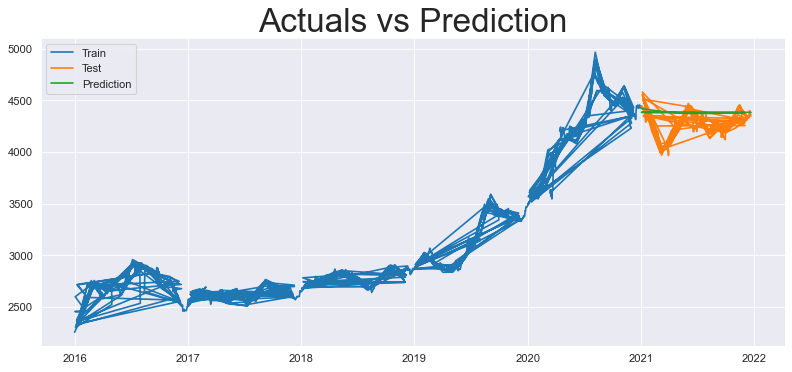

In [93]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [95]:
mse = mean_squared_error(test_pred['predicted_mean'],test['price'])
print(f'Mean Squared Error (MSE) = ',mse)
Arima_rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',Arima_rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test.price)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.price)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  26584.12078031868
Root Mean Squared Error (RMSE) =  163.05
Mean Absolute Error (MAE)  =  130.3971572870457
Mean Absolute Percentage Error (MAPE)  =  0.029745741668401018


# Forecast for the 30 Days

In [96]:
forecast = result.predict(len(df), len(df)+31, type = 'levels')
forecast
index_future_dates = pd.date_range(start='2021-12-21', end = '2022-01-21')
forecast.index=index_future_dates
print(forecast)

2021-12-21    4383.713458
2021-12-22    4383.713458
2021-12-23    4383.713458
2021-12-24    4383.713458
2021-12-25    4383.713458
2021-12-26    4383.713458
2021-12-27    4383.713458
2021-12-28    4383.713458
2021-12-29    4383.713458
2021-12-30    4383.713458
2021-12-31    4383.713458
2022-01-01    4383.713458
2022-01-02    4383.713458
2022-01-03    4383.713458
2022-01-04    4383.713458
2022-01-05    4383.713458
2022-01-06    4383.713458
2022-01-07    4383.713458
2022-01-08    4383.713458
2022-01-09    4383.713458
2022-01-10    4383.713458
2022-01-11    4383.713458
2022-01-12    4383.713458
2022-01-13    4383.713458
2022-01-14    4383.713458
2022-01-15    4383.713458
2022-01-16    4383.713458
2022-01-17    4383.713458
2022-01-18    4383.713458
2022-01-19    4383.713458
2022-01-20    4383.713458
2022-01-21    4383.713458
Freq: D, Name: predicted_mean, dtype: float64


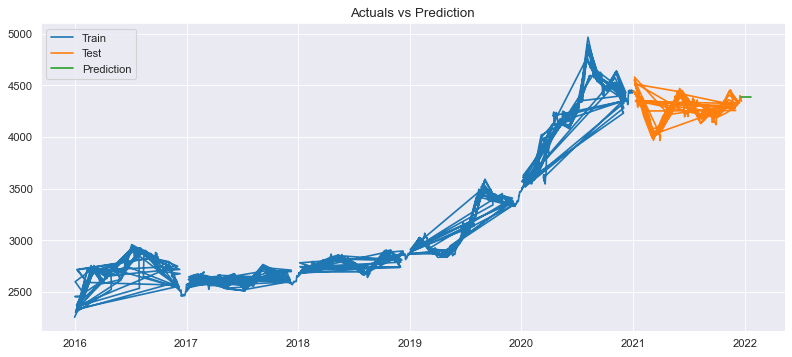

In [97]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

<Axes: >

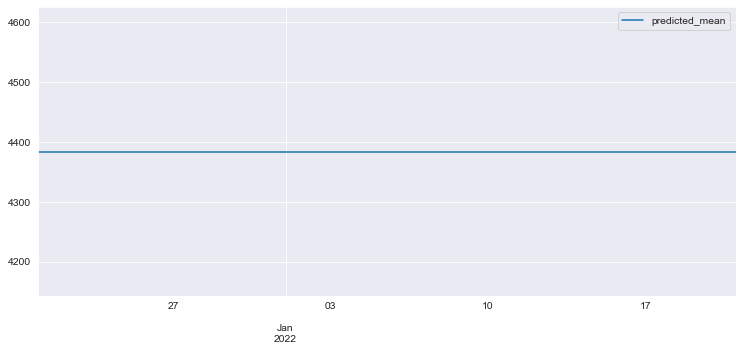

In [98]:
forecast.plot(figsize=(12,5), legend=True)

In [99]:
import pickle 

In [101]:
with open("project.py", "wb") as f:
    pickle.dump(model, f)